In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score, recall_score, precision_score, SCORERS

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings

from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

%matplotlib inline

In [24]:
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv('Datasets/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [27]:
df.shape

(12330, 18)

In [28]:
df.isnull().sum()*100/len(df)

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

In [29]:
for feature in df.columns:
    if df[feature].dtype != 'O' and df[feature].dtype != 'bool':
        print(feature, df[feature].dtype, df[feature].nunique())

Administrative int64 27
Administrative_Duration float64 3335
Informational int64 17
Informational_Duration float64 1258
ProductRelated int64 311
ProductRelated_Duration float64 9551
BounceRates float64 1872
ExitRates float64 4777
PageValues float64 2704
SpecialDay float64 6
OperatingSystems int64 8
Browser int64 13
Region int64 9
TrafficType int64 20


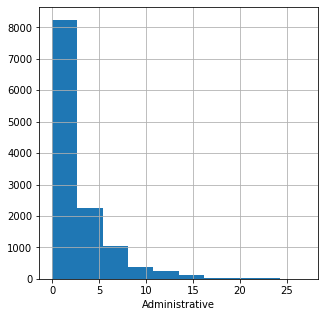

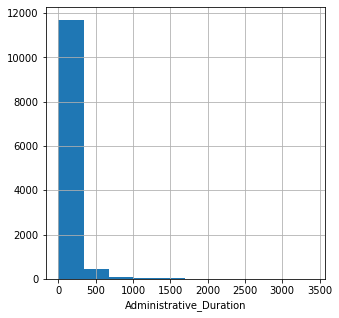

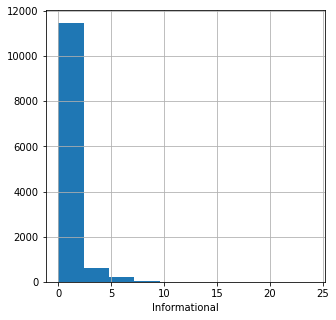

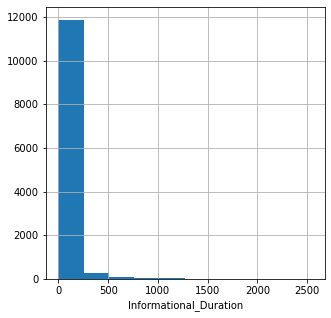

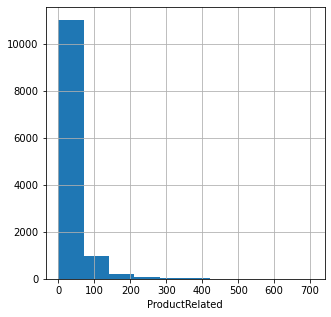

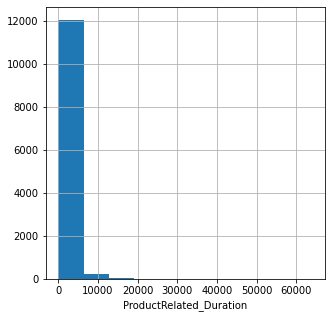

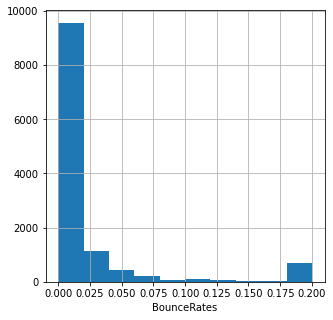

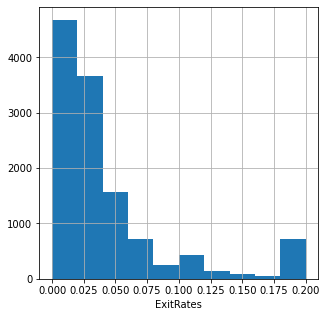

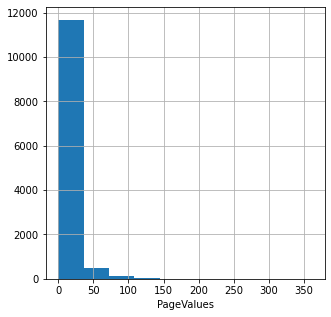

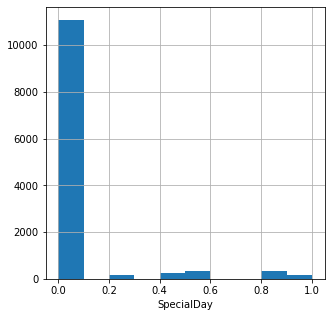

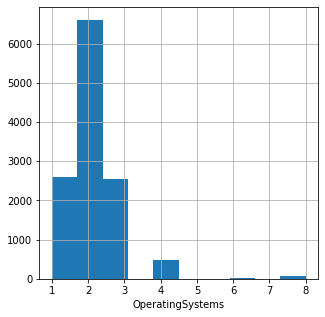

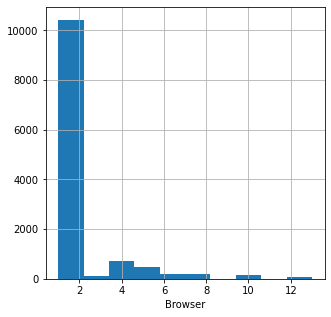

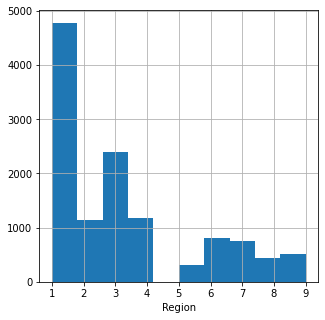

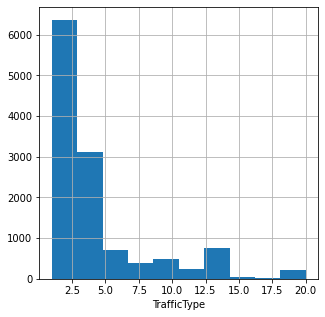

In [30]:
for feature in df.columns:
    if df[feature].dtype != 'O' and df[feature].dtype != 'bool':
        plt.figure(figsize=(5,5))
        df[feature].hist(bins=10)
        plt.xlabel(feature)
        plt.show()

In [31]:
num_features = []
cat_features = []
for feature in df.columns:
    if df[feature].nunique() < 15:
        cat_features.append(feature)
    else:
        num_features.append(feature)

print(cat_features)
print(num_features)

['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'VisitorType', 'Weekend', 'Revenue']
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'TrafficType']


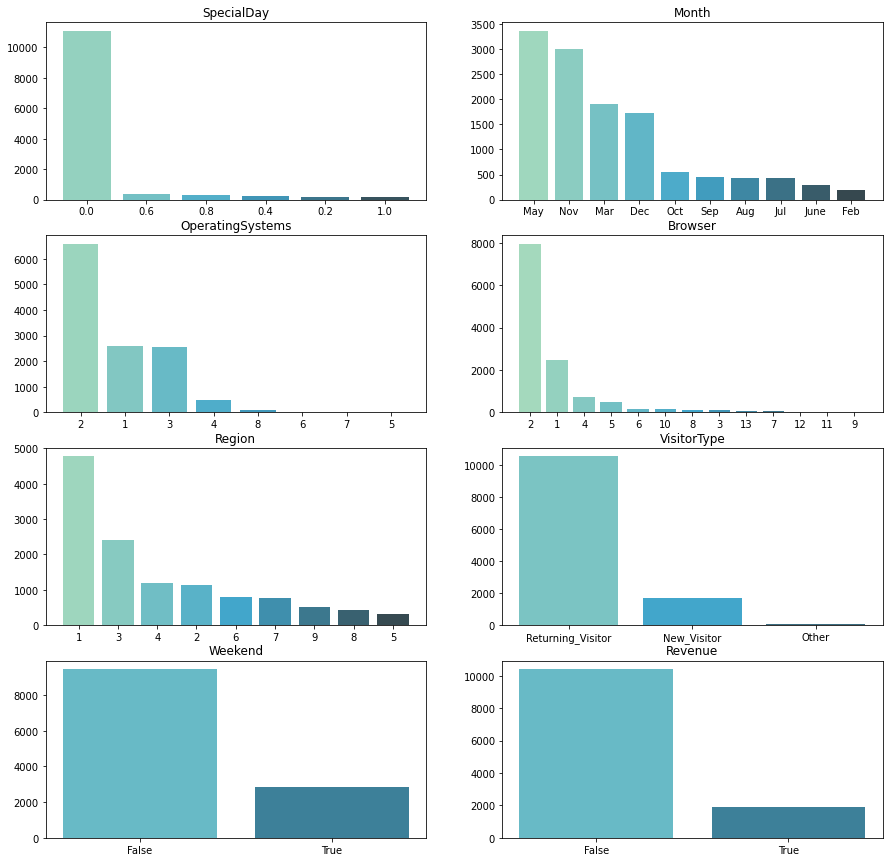

In [32]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))

for index, feature in enumerate(cat_features):
    i = index//2
    j = index%2

    ax[i, j].bar(df[feature].astype('str').value_counts().index, df[feature].value_counts(), color=sns.color_palette("GnBu_d", n_colors=df[feature].nunique()))
    ax[i, j].set_title(feature)

    

In [33]:
def plot_revenue_with_feature(feature):
    plt.figure(figsize=(10, 10))
    barwidth = 0.30

    data = df[[feature, 'Revenue']]
    bars1 = data[df['Revenue'] == True].groupby([feature]).Revenue.count()
    bars2 = data[df['Revenue'] == False].groupby([feature]).Revenue.count()

    pos1 = np.arange(len(bars1))
    pos2 = [x + barwidth for x in pos1]

    plt.bar(pos1, bars1, color=sns.color_palette("GnBu_d",n_colors=2)[0], width=barwidth, label='revenue')
    plt.bar(pos2, bars2, color=sns.color_palette("GnBu_d",n_colors=2)[1], width=barwidth, label='no-revenue')

    plt.xlabel(feature)
    plt.legend()
    plt.xticks(pos2, bars1.index)
    plt.show()


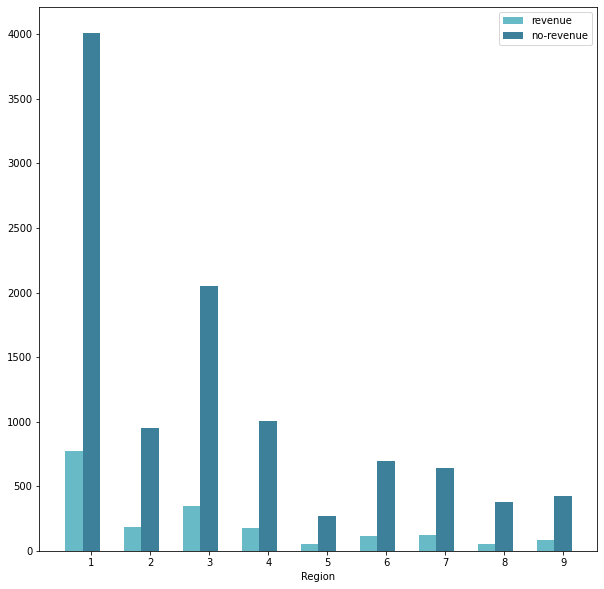

In [34]:
plot_revenue_with_feature('Region')

In [35]:
num_features

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'TrafficType']

In [36]:
cat_features

['SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'VisitorType',
 'Weekend',
 'Revenue']

In [37]:
cat_features_df = df[cat_features].astype('category')
ohc = pd.get_dummies(cat_features_df, drop_first=True)
df_ohc = pd.concat([df[num_features], ohc.drop('Revenue_True', axis=1)], axis=1)
y = ohc['Revenue_True']

In [38]:
df_ohc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,TrafficType,...,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,2,...,0,0,0,0,0,0,0,0,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,3,...,0,0,0,0,0,0,1,0,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,4,...,0,0,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,4,...,0,0,0,0,0,0,0,0,1,1


In [39]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue_True, dtype: uint8

In [72]:
def base_models(data):
    models = [DecisionTreeClassifier(), LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier(), XGBClassifier()]

    if len(data) == 2:

        X = data[0]
        y = data[1]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    else:
        X_train = data[0]
        X_test = data[1]
        y_train = data[2]
        y_test = data[3]

    accuracy = []
    auc = []
    recall = []
    precision = []
    f1 = []
    feature_importance = []

    for index, model in enumerate(models):
        clf = model
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        f1.append(f1_score(y_test, preds))
        auc.append(roc_auc_score(y_test, preds))
        precision.append(precision_score(y_test, preds))
        recall.append(recall_score(y_test, preds))
        accuracy.append(accuracy_score(y_test, preds))

        print("Classification Model: ", model)
        print(classification_report(y_test, preds))

        if index == len(models)-1:
            feature_importance = model.feature_importances_
            # print(feature_importance)
            
    results = pd.DataFrame([f1,auc, accuracy, precision,recall],
                      index= ['f1','roc_auc','accuracy','precision','recall',],
                           columns=['DecisionTree','LogisticRegression','RandomForest','Gradient Boosting', 'XGBoost'])
    
    return results, feature_importance

In [41]:
results, feature_importance = base_models([df_ohc, y])

Classification Model:  DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2044
           1       0.57      0.52      0.54       422

    accuracy                           0.85      2466
   macro avg       0.74      0.72      0.73      2466
weighted avg       0.85      0.85      0.85      2466

Classification Model:  LogisticRegression()
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2044
           1       0.75      0.35      0.48       422

    accuracy                           0.87      2466
   macro avg       0.82      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466

Classification Model:  RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2044
           1       0.76      0.50      0.61       422

    accuracy                           0.8

In [42]:
results

,DecisionTree,LogisticRegression,RandomForest,Gradient Boosting,XGBoost
f1,0.542289,0.478191,0.605974,0.652576,0.632812
roc_auc,0.718176,0.663369,0.735736,0.771128,0.762719
accuracy,0.850770,0.869019,0.887672,0.893350,0.885645
precision,0.570681,0.751269,0.758007,0.737313,0.702312
recall,0.516588,0.350711,0.504739,0.585308,0.575829


In [43]:
df_ohc[num_features].corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,TrafficType
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.033561
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.014376
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.034491
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.024675
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.043064
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036377
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.078286
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.078616
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,0.012532
TrafficType,-0.033561,-0.014376,-0.034491,-0.024675,-0.043064,-0.036377,0.078286,0.078616,0.012532,1.000000


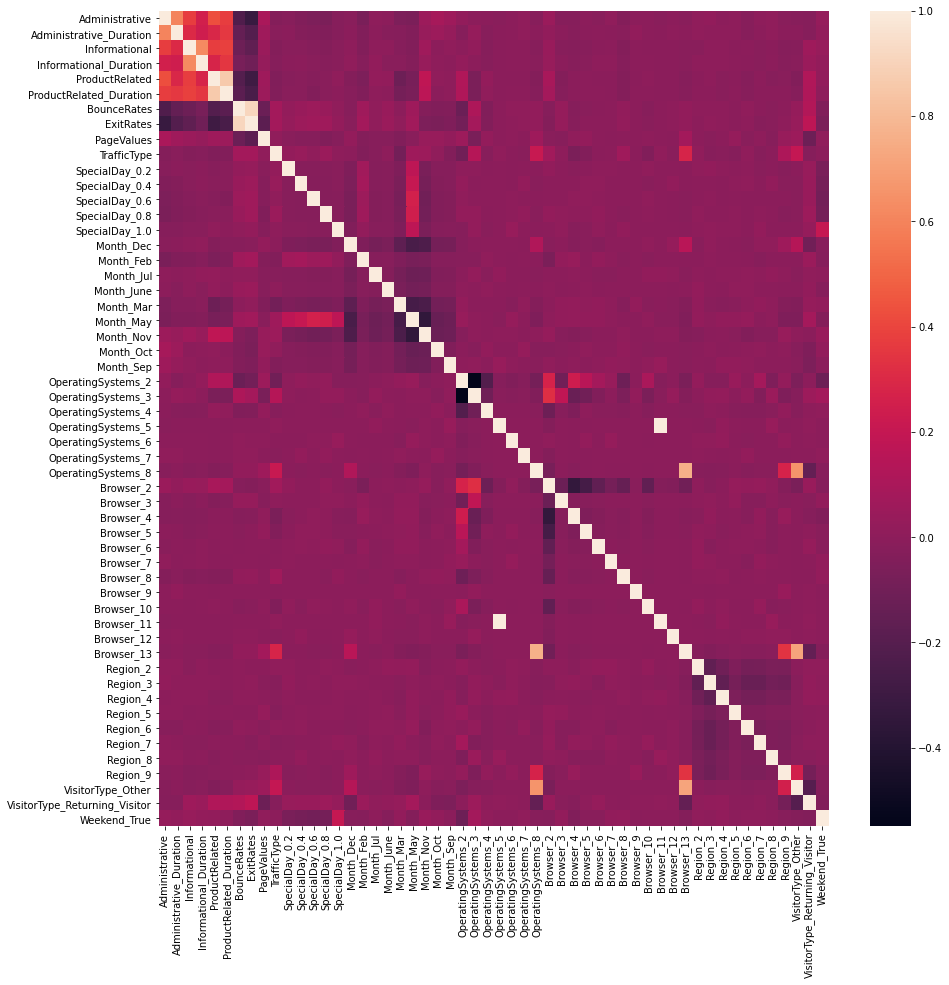

In [44]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_ohc.corr(), annot=False)

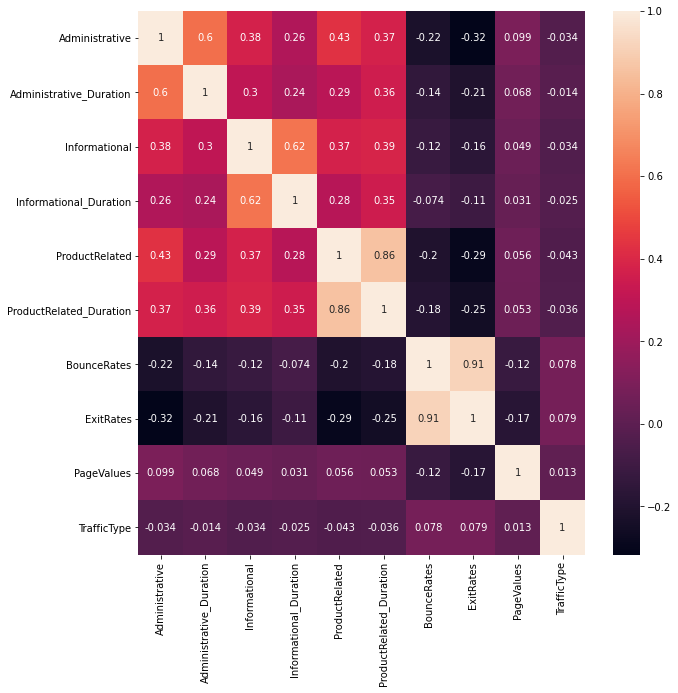

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(df_ohc[num_features].corr(), annot=True)

# ProductRelated and ProductRelated_Duration are having 0.86 value so I will choose one of them to reduce the collinearity
# BounceRates and ExitRates are having 0.91 value so I will choose one of them
# To decide which feature to choose I will plot a graph for feature importance and choose the feature which is more important

In [46]:
print(feature_importance)

[0.02203667 0.02132228 0.01207052 0.01754191 0.02213171 0.0201501
 0.03243581 0.0189686  0.15918207 0.01672805 0.         0.
 0.0092125  0.         0.         0.025103   0.00924056 0.02191535
 0.0179875  0.04837573 0.05588486 0.08454782 0.01668158 0.02793392
 0.01081334 0.01255989 0.00988073 0.         0.         0.
 0.00668975 0.01237023 0.00950314 0.01698294 0.01271552 0.00850772
 0.         0.01066196 0.         0.0130473  0.         0.
 0.         0.0161784  0.01346664 0.01395478 0.01583968 0.01763238
 0.03129057 0.01207988 0.02156819 0.01234842 0.04487725 0.01758076]


<Figure size 1440x1440 with 0 Axes>

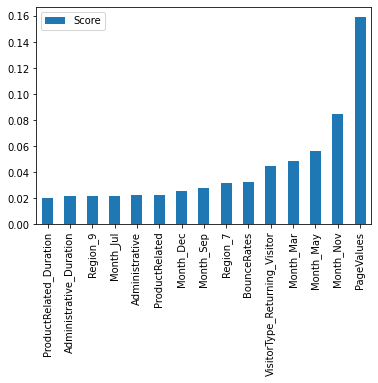

In [47]:
plt.figure(figsize=(20, 20))
df_importance = pd.DataFrame(feature_importance, index=df_ohc.columns, columns=["Score"])
df_importance.sort_values(by='Score', ascending=True).tail(15).plot(kind='bar')

In [48]:
num_features = list(set(num_features)-set(['ProductRelated_Duration', 'ExitRates']))

In [56]:
df_ohc.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,TrafficType,SpecialDay_0.2,SpecialDay_0.4,...,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,0.0,0,0.0,1,0.20,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,2,0.00,0.0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.0,0,0.0,1,0.20,0.0,3,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0.0,0,0.0,2,0.05,0.0,4,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,10,0.02,0.0,4,0,0,...,0,0,0,0,0,0,0,0,1,1


In [64]:
results2, _ = base_models([df_ohc, y])


Classification Model:  DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2044
           1       0.56      0.51      0.54       422

    accuracy                           0.85      2466
   macro avg       0.73      0.72      0.72      2466
weighted avg       0.84      0.85      0.85      2466

Classification Model:  LogisticRegression()
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2044
           1       0.73      0.35      0.47       422

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.85      0.87      0.85      2466

Classification Model:  RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2044
           1       0.75      0.53      0.62       422

    accuracy                           0.8

In [65]:
results2

,DecisionTree,LogisticRegression,RandomForest,Gradient Boosting,XGBoost
f1,0.537794,0.471910,0.621547,0.643979,0.630065
roc_auc,0.716013,0.660961,0.747752,0.767986,0.760594
accuracy,0.848743,0.866586,0.888889,0.889700,0.885239
precision,0.563636,0.731343,0.745033,0.719298,0.702624
recall,0.514218,0.348341,0.533175,0.582938,0.571090


In [66]:
results

,DecisionTree,LogisticRegression,RandomForest,Gradient Boosting,XGBoost
f1,0.542289,0.478191,0.605974,0.652576,0.632812
roc_auc,0.718176,0.663369,0.735736,0.771128,0.762719
accuracy,0.850770,0.869019,0.887672,0.893350,0.885645
precision,0.570681,0.751269,0.758007,0.737313,0.702312
recall,0.516588,0.350711,0.504739,0.585308,0.575829


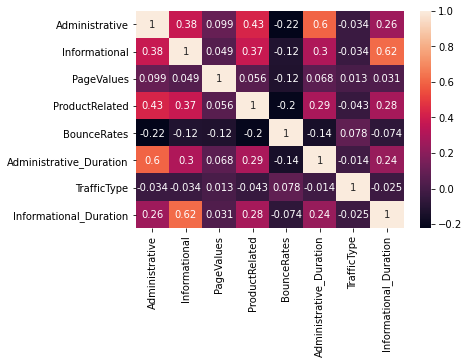

In [67]:
sns.heatmap(df_ohc[num_features].corr(), annot=True)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df_ohc, y, test_size=0.2, random_state=0)

In [71]:
scaler = StandardScaler()

scaled_num_features_train = pd.DataFrame(scaler.fit_transform(X_train[num_features]), columns=num_features, index=X_train.index)

for feature in num_features:
    X_train[feature] = scaled_num_features_train[feature]

scaled_num_features_test = pd.DataFrame(scaler.transform(X_test[num_features]), columns=num_features, index=X_test.index)

for feature in num_features:
    X_test[feature] = scaled_num_features_test[feature]

In [76]:
results3, _ = base_models([X_train, X_test, y_train, y_test])

Classification Model:  DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2044
           1       0.57      0.54      0.55       422

    accuracy                           0.85      2466
   macro avg       0.74      0.73      0.73      2466
weighted avg       0.85      0.85      0.85      2466

Classification Model:  LogisticRegression()
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2044
           1       0.75      0.37      0.50       422

    accuracy                           0.87      2466
   macro avg       0.82      0.67      0.71      2466
weighted avg       0.86      0.87      0.85      2466

Classification Model:  RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2044
           1       0.74      0.51      0.61       422

    accuracy                           0.8

In [77]:
results3

,DecisionTree,LogisticRegression,RandomForest,Gradient Boosting,XGBoost
f1,0.552984,0.498413,0.606145,0.643979,0.630065
roc_auc,0.726883,0.673543,0.738273,0.767986,0.760594
accuracy,0.851176,0.871857,0.885645,0.889700,0.885239
precision,0.568922,0.754808,0.738095,0.719298,0.702624
recall,0.537915,0.372038,0.514218,0.582938,0.571090


In [78]:
X_train.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,TrafficType,SpecialDay_0.2,SpecialDay_0.4,...,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
count,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9.864000e+03,9864.000000,9864.000000,...,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000,9864.000000
mean,-6.122884e-17,2.016950e-17,2.449154e-17,-5.042375e-18,-4.250002e-17,-5.627651e-17,-1.728814e-17,1.112924e-16,0.013990,0.019769,...,0.196472,0.095702,0.024838,0.065896,0.062145,0.035787,0.041565,0.006894,0.855130,0.235807
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,0.117456,0.139212,...,0.397350,0.294196,0.155638,0.248113,0.241431,0.185767,0.199604,0.082746,0.351988,0.424524
min,-6.984716e-01,-4.536834e-01,-3.921074e-01,-2.415948e-01,-7.094576e-01,-4.572977e-01,-3.190355e-01,-7.636871e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.984716e-01,-4.536834e-01,-3.921074e-01,-2.415948e-01,-5.534567e-01,-4.572977e-01,-3.190355e-01,-5.160048e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-3.972288e-01,-4.146459e-01,-3.921074e-01,-2.415948e-01,-3.083124e-01,-3.960537e-01,-3.190355e-01,-5.160048e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.064996e-01,7.053411e-02,-3.921074e-01,-2.415948e-01,1.374045e-01,-1.090653e-01,-3.190355e-01,-2.064019e-02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7.435084e+00,1.850040e+01,1.836440e+01,1.792683e+01,1.500206e+01,3.657799e+00,1.949259e+01,3.942277e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
